# Advanced ECG Analysis Using Transfer Learning and Convolutional Neural Networks;

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os

In [2]:
train_dir = 'ECG_DATA/train/' 
test_dir  =  'ECG_DATA/test/'

In [3]:
def get_subfolders_and_image_counts(directory): 
    subfolders = {}
    for subdir, dirs, files in os.walk(directory): 
        if dirs:
            for folder in dirs:
                folder_path = os.path.join(subdir, folder)
                num_images = len([file for file in os.listdir(folder_path)
                                  if file.endswith(('.png', '.jpg', '.jpeg'))])
                subfolders[folder] = num_images
            return subfolders

In [4]:
train_subfolders   =   get_subfolders_and_image_counts(train_dir)
test_subfolders   =    get_subfolders_and_image_counts(test_dir)

In [5]:
print("Training Subfolders and Image Counts ----->")
for folder, count in train_subfolders.items():
    print(f"{folder}:  {count}  images")

Training Subfolders and Image Counts ----->
ECG Images of Myocardial Infarction Patients (240x12=2880):  956  images
ECG Images of Patient that have abnormal heartbeat (233x12=2796):  699  images
ECG Images of Patient that have History of MI (172x12=2064):  516  images
Normal Person ECG Images (284x12=3408):  852  images


In [6]:
print("\nTest Subfolders and Image Counts ------->")
for folder, count in test_subfolders.items():
    print(f"{folder}:  {count}  images")


Test Subfolders and Image Counts ------->
ECG Images of Myocardial Infarction Patients (240x12=2880):  239  images
ECG Images of Patient that have abnormal heartbeat (233x12=2796):  233  images
ECG Images of Patient that have History of MI (172x12=2064):  172  images
Normal Person ECG Images (284x12=3408):  284  images



Showing 10 images from ECG Images of Myocardial Infarction Patients (240x12=2880):


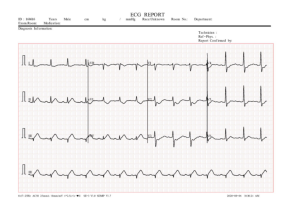

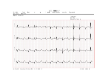

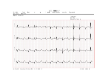

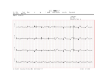

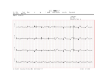

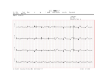

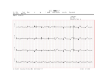

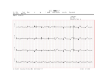

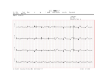

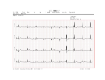


Showing 10 images from ECG Images of Patient that have abnormal heartbeat (233x12=2796):


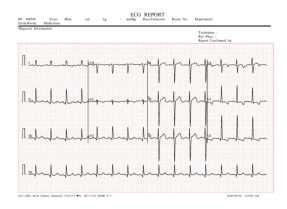

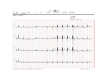

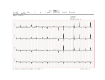

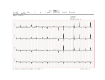

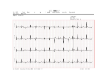

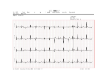

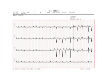

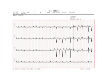

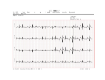

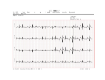


Showing 10 images from ECG Images of Patient that have History of MI (172x12=2064):


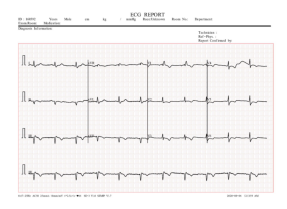

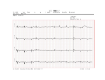

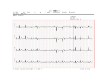

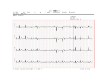

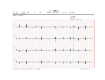

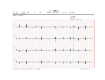

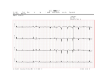

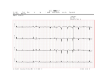

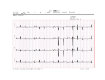

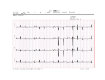


Showing 10 images from Normal Person ECG Images (284x12=3408):


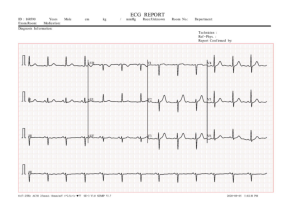

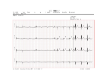

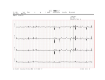

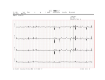

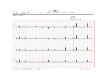

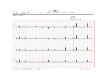

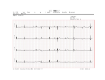

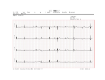

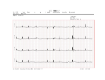

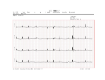

In [7]:
def plot_images_from_subfolders(directory, subfolders): 
    for folder in subfolders:
        folder_path = os.path.join(directory, folder)
        image_files = [file for file in os.listdir(folder_path) if 
                       file.endswith(('.png', '.jpg', '.jpeg'))][:10]
        print(f"\nShowing 10 images from {folder}:")
        plt.figure(figsize=(20, 10))
        for i, image_file in enumerate(image_files): 
            img_path = os.path.join(folder_path, image_file) 
            img = mpimg.imread(img_path)
            plt.subplot(2, 5, i+1)
            plt.imshow(img) 
            plt.axis('off')
            plt.show() 
plot_images_from_subfolders(train_dir, train_subfolders)


Showing 10 images from ECG Images of Myocardial Infarction Patients (240x12=2880):


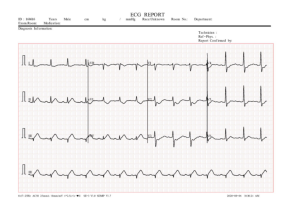

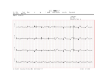

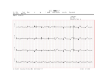

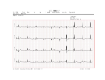

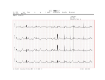

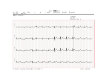

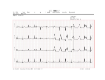

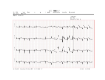

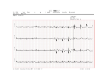

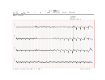


Showing 10 images from ECG Images of Patient that have abnormal heartbeat (233x12=2796):


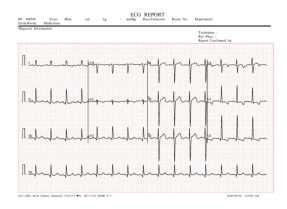

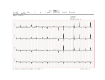

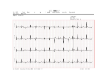

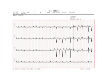

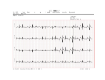

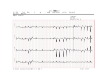

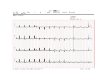

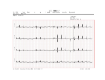

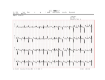

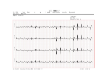


Showing 10 images from ECG Images of Patient that have History of MI (172x12=2064):


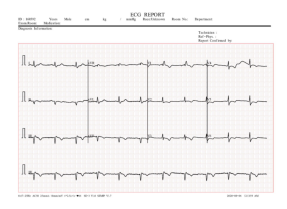

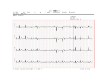

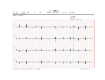

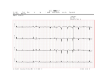

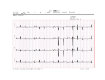

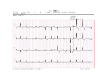

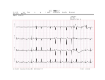

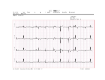

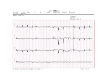

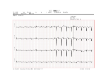


Showing 10 images from Normal Person ECG Images (284x12=3408):


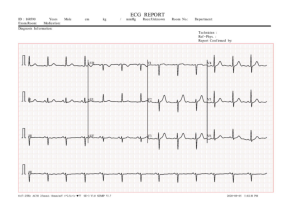

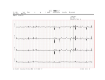

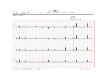

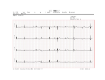

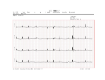

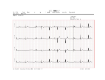

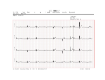

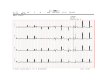

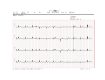

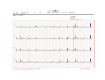

In [8]:
plot_images_from_subfolders(test_dir, test_subfolders)

In [9]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator( rescale=1./255, validation_split=0.2)

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255) 

In [12]:
train_generator  =  train_datagen.flow_from_directory(train_dir,
                                    target_size=(224, 224), 
                                    batch_size=32, 
                                    class_mode='categorical',
                                    subset='training')


Found 2420 images belonging to 4 classes.


In [13]:
validation_generator = train_datagen.flow_from_directory( train_dir,
                        target_size=(224, 224), 
                        batch_size=32, 
                        class_mode='categorical', 
                        subset='validation'
)

Found 603 images belonging to 4 classes.


In [14]:
test_generator = test_datagen.flow_from_directory( test_dir,
                            target_size=(224, 224), 
                            batch_size=32, 
                            class_mode='categorical'
)

Found 928 images belonging to 4 classes.


In [15]:
print("Class  indices:",  train_generator.class_indices) 

Class  indices: {'ECG Images of Myocardial Infarction Patients (240x12=2880)': 0, 'ECG Images of Patient that have History of MI (172x12=2064)': 1, 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 2, 'Normal Person ECG Images (284x12=3408)': 3}


In [16]:
import tensorflow as tf

In [17]:
gpus = tf.config.experimental.list_physical_devices('GPU') 
if gpus:
    try:
      for gpu in gpus: 
         tf.config.experimental.set_memory_growth(gpu, True)
      print("GPUs are available and memory growth is set.") 
    except RuntimeError as e:
        print(e)

In [18]:
from keras import layers, models 

In [19]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'), 
    layers.Dense(len(train_generator.class_indices),activation='softmax')
])

C:\Users\HP\anaconda3\envs\abhijitg_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(train_generator,
            steps_per_epoch=train_generator.samples // train_generator.batch_size,
            validation_data=validation_generator, 
            validation_steps=validation_generator.samples //
            validation_generator.batch_size, epochs=10
)

Epoch 1/10


C:\Users\HP\anaconda3\envs\abhijitg_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.3040 - loss: 1.8563 - val_accuracy: 0.3681 - val_loss: 1.3798
Epoch 2/10
 1/75 ━━━━━━━━━━━━━━━━━━━━ 42s 577ms/step - accuracy: 0.2812 - loss: 1.3859

C:\Users\HP\anaconda3\envs\abhijitg_env\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2812 - loss: 1.3859 - val_accuracy: 0.2222 - val_loss: 1.3875
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.3336 - loss: 1.3737 - val_accuracy: 0.5312 - val_loss: 1.3539
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3438 - loss: 1.4628 - val_accuracy: 0.2593 - val_loss: 1.3964
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.4012 - loss: 1.2740 - val_accuracy: 0.8160 - val_loss: 0.5567
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8125 - loss: 0.5978 - val_accuracy: 0.6667 - val_loss: 0.6410
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.8756 - loss: 0.3637 - val_accuracy: 0.9792 - val_loss: 0.0680
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0647 - val_accuracy: 0.9630 - val_loss: 0.0918
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.9875 - loss: 0.0495 - val_accuracy: 0.9931 - val_loss: 0.0281
Ep

In [23]:
test_loss, test_acc = model.evaluate(test_generator) 

29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 890ms/step - accuracy: 1.0000 - loss: 0.0121


In [24]:
print(f"\nTest Accuracy => {test_acc}")


Test Accuracy => 1.0


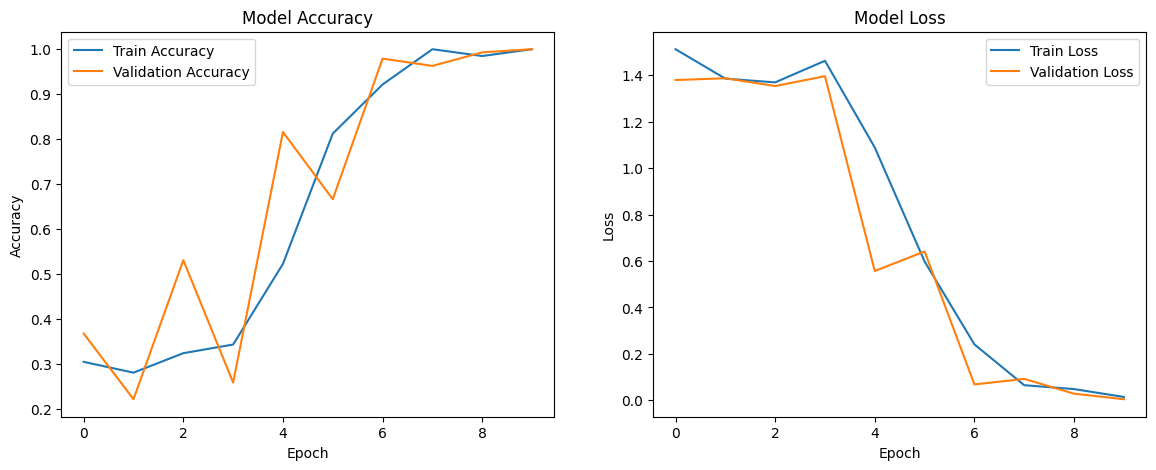

In [25]:
def  plot_training_history(history):
        plt.figure(figsize=(14, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy') 
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy') 
        plt.xlabel('Epoch') 
        plt.ylabel('Accuracy') 
        plt.legend()
        plt.subplot(1, 2, 2) 
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss') 
        plt.title('Model Loss')
        plt.xlabel('Epoch') 
        plt.ylabel('Loss') 
        plt.legend()
        plt.show()
plot_training_history(history)

In [26]:
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes  =  np.argmax(predictions,  axis=1) 
true_classes  =  test_generator.classes
class_labels  =  list(test_generator.class_indices.keys())

30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 827ms/step


In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
cm = confusion_matrix(true_classes, predicted_classes) 

In [29]:
print("Confusion  Matrix:")
print(cm)

Confusion  Matrix:
[[59 48 60 72]
 [45 35 43 49]
 [65 39 59 70]
 [70 50 71 93]]


In [30]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

In [31]:
print("\nClassification Report =>") 
print(report)


Classification Report =>
                                                                  precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)       0.25      0.25      0.25       239
     ECG Images of Patient that have History of MI (172x12=2064)       0.20      0.20      0.20       172
ECG Images of Patient that have abnormal heartbeat (233x12=2796)       0.25      0.25      0.25       233
                          Normal Person ECG Images (284x12=3408)       0.33      0.33      0.33       284

                                                        accuracy                           0.27       928
                                                       macro avg       0.26      0.26      0.26       928
                                                    weighted avg       0.27      0.27      0.27       928



In [32]:
import seaborn as sns

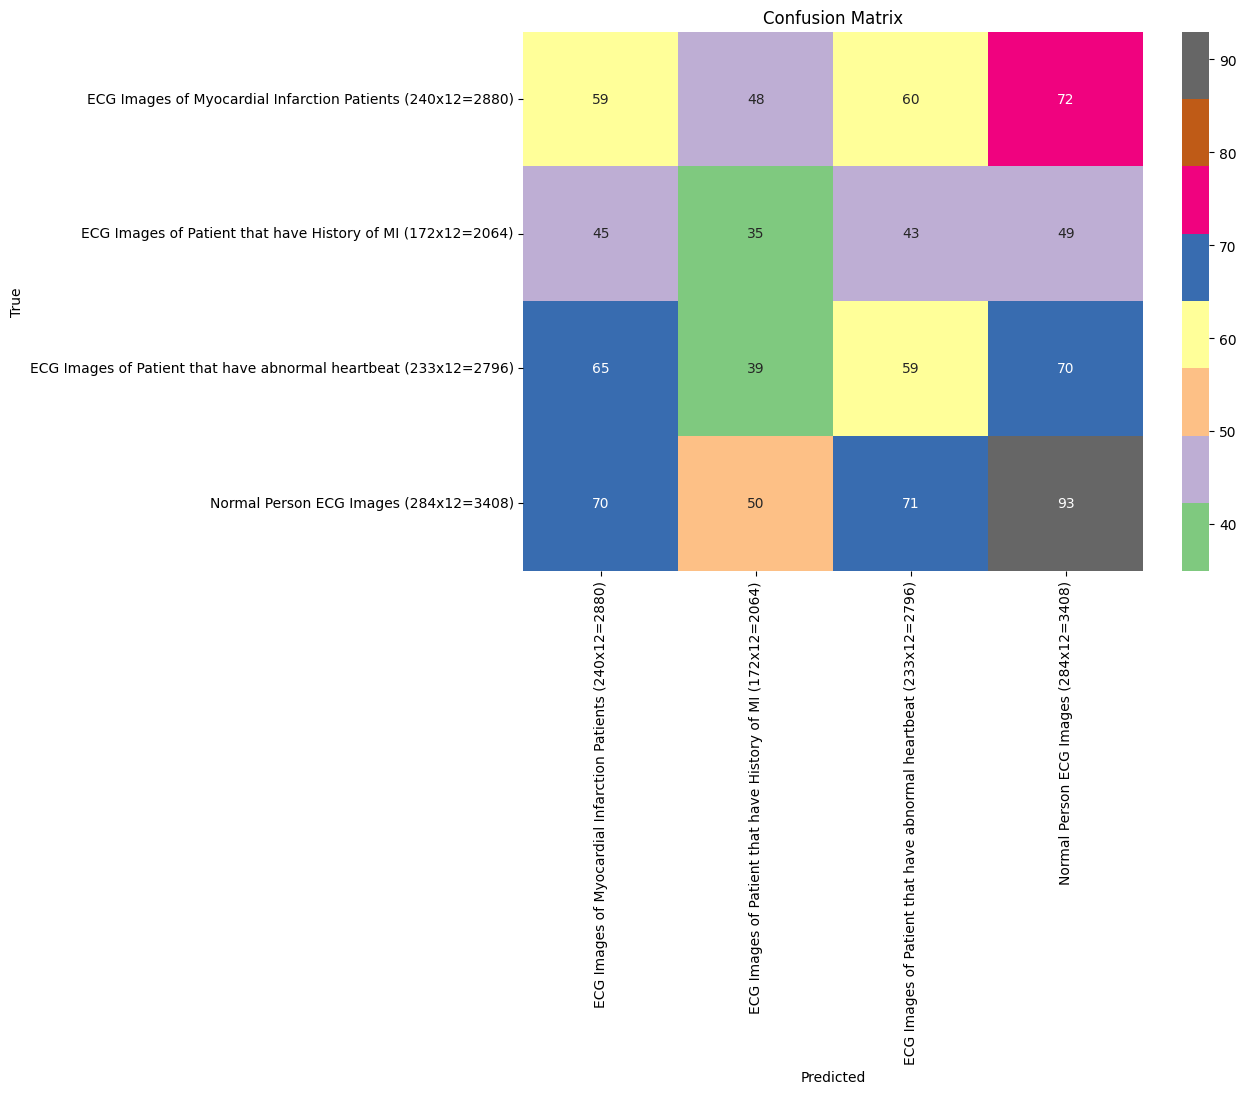

In [34]:
def plot_confusion_matrix(cm, labels): 
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Accent', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted') 
    plt.ylabel('True') 
    plt.title('Confusion Matrix') 
    plt.show()
plot_confusion_matrix(cm, class_labels)